In [19]:
!pip install caer

In [21]:
!pip install canaro

In [22]:
import caer
import canaro
import numpy as np
import os
import cv2 as cv
import gc

In [23]:
IMG_SIZE=(80,80)
channels=1
char_path=r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [24]:
char_dict={}

In [25]:
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
char_dict=caer.sort_dict(char_dict,descending=True)

In [26]:
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [27]:
characters=[]
count=0

for i in char_dict:
    characters.append(i[0])
    # print(i[0])
    count+=1
    if count>=10:
        break

characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [28]:
# craete the training data
train=caer.preprocess_from_dir(char_path,characters,channels=channels,IMG_SIZE=IMG_SIZE,isShuffle=True,verbose=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.5847916603088379s
[INFO] At 1000 files
[INFO] 1454 files found in 0.44832396507263184s
[INFO] At 1000 files
[INFO] 1452 files found in 0.49066925048828125s
[INFO] At 1000 files
[INFO] 1354 files found in 2.513312816619873s
[INFO] At 1000 files
[INFO] 1342 files found in 2.1977035999298096s
[INFO] At 1000 files
[INFO] 1291 files found in 1.774099349975586s
[INFO] At 1000 files
[INFO] 1206 files found in 1.6696534156799316s
[INFO] At 1000 files
[INFO] 1194 files found in 2.2194552421569824s
[INFO] At 1000 files
[INFO] 1193 files found in 1.8416447639465332s
[INFO] At 1000 files
[INFO] 1079 files found in 3.121236562728882s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 1m 33s


In [30]:
len(train)

13811

In [31]:
import matplotlib.pyplot as plt

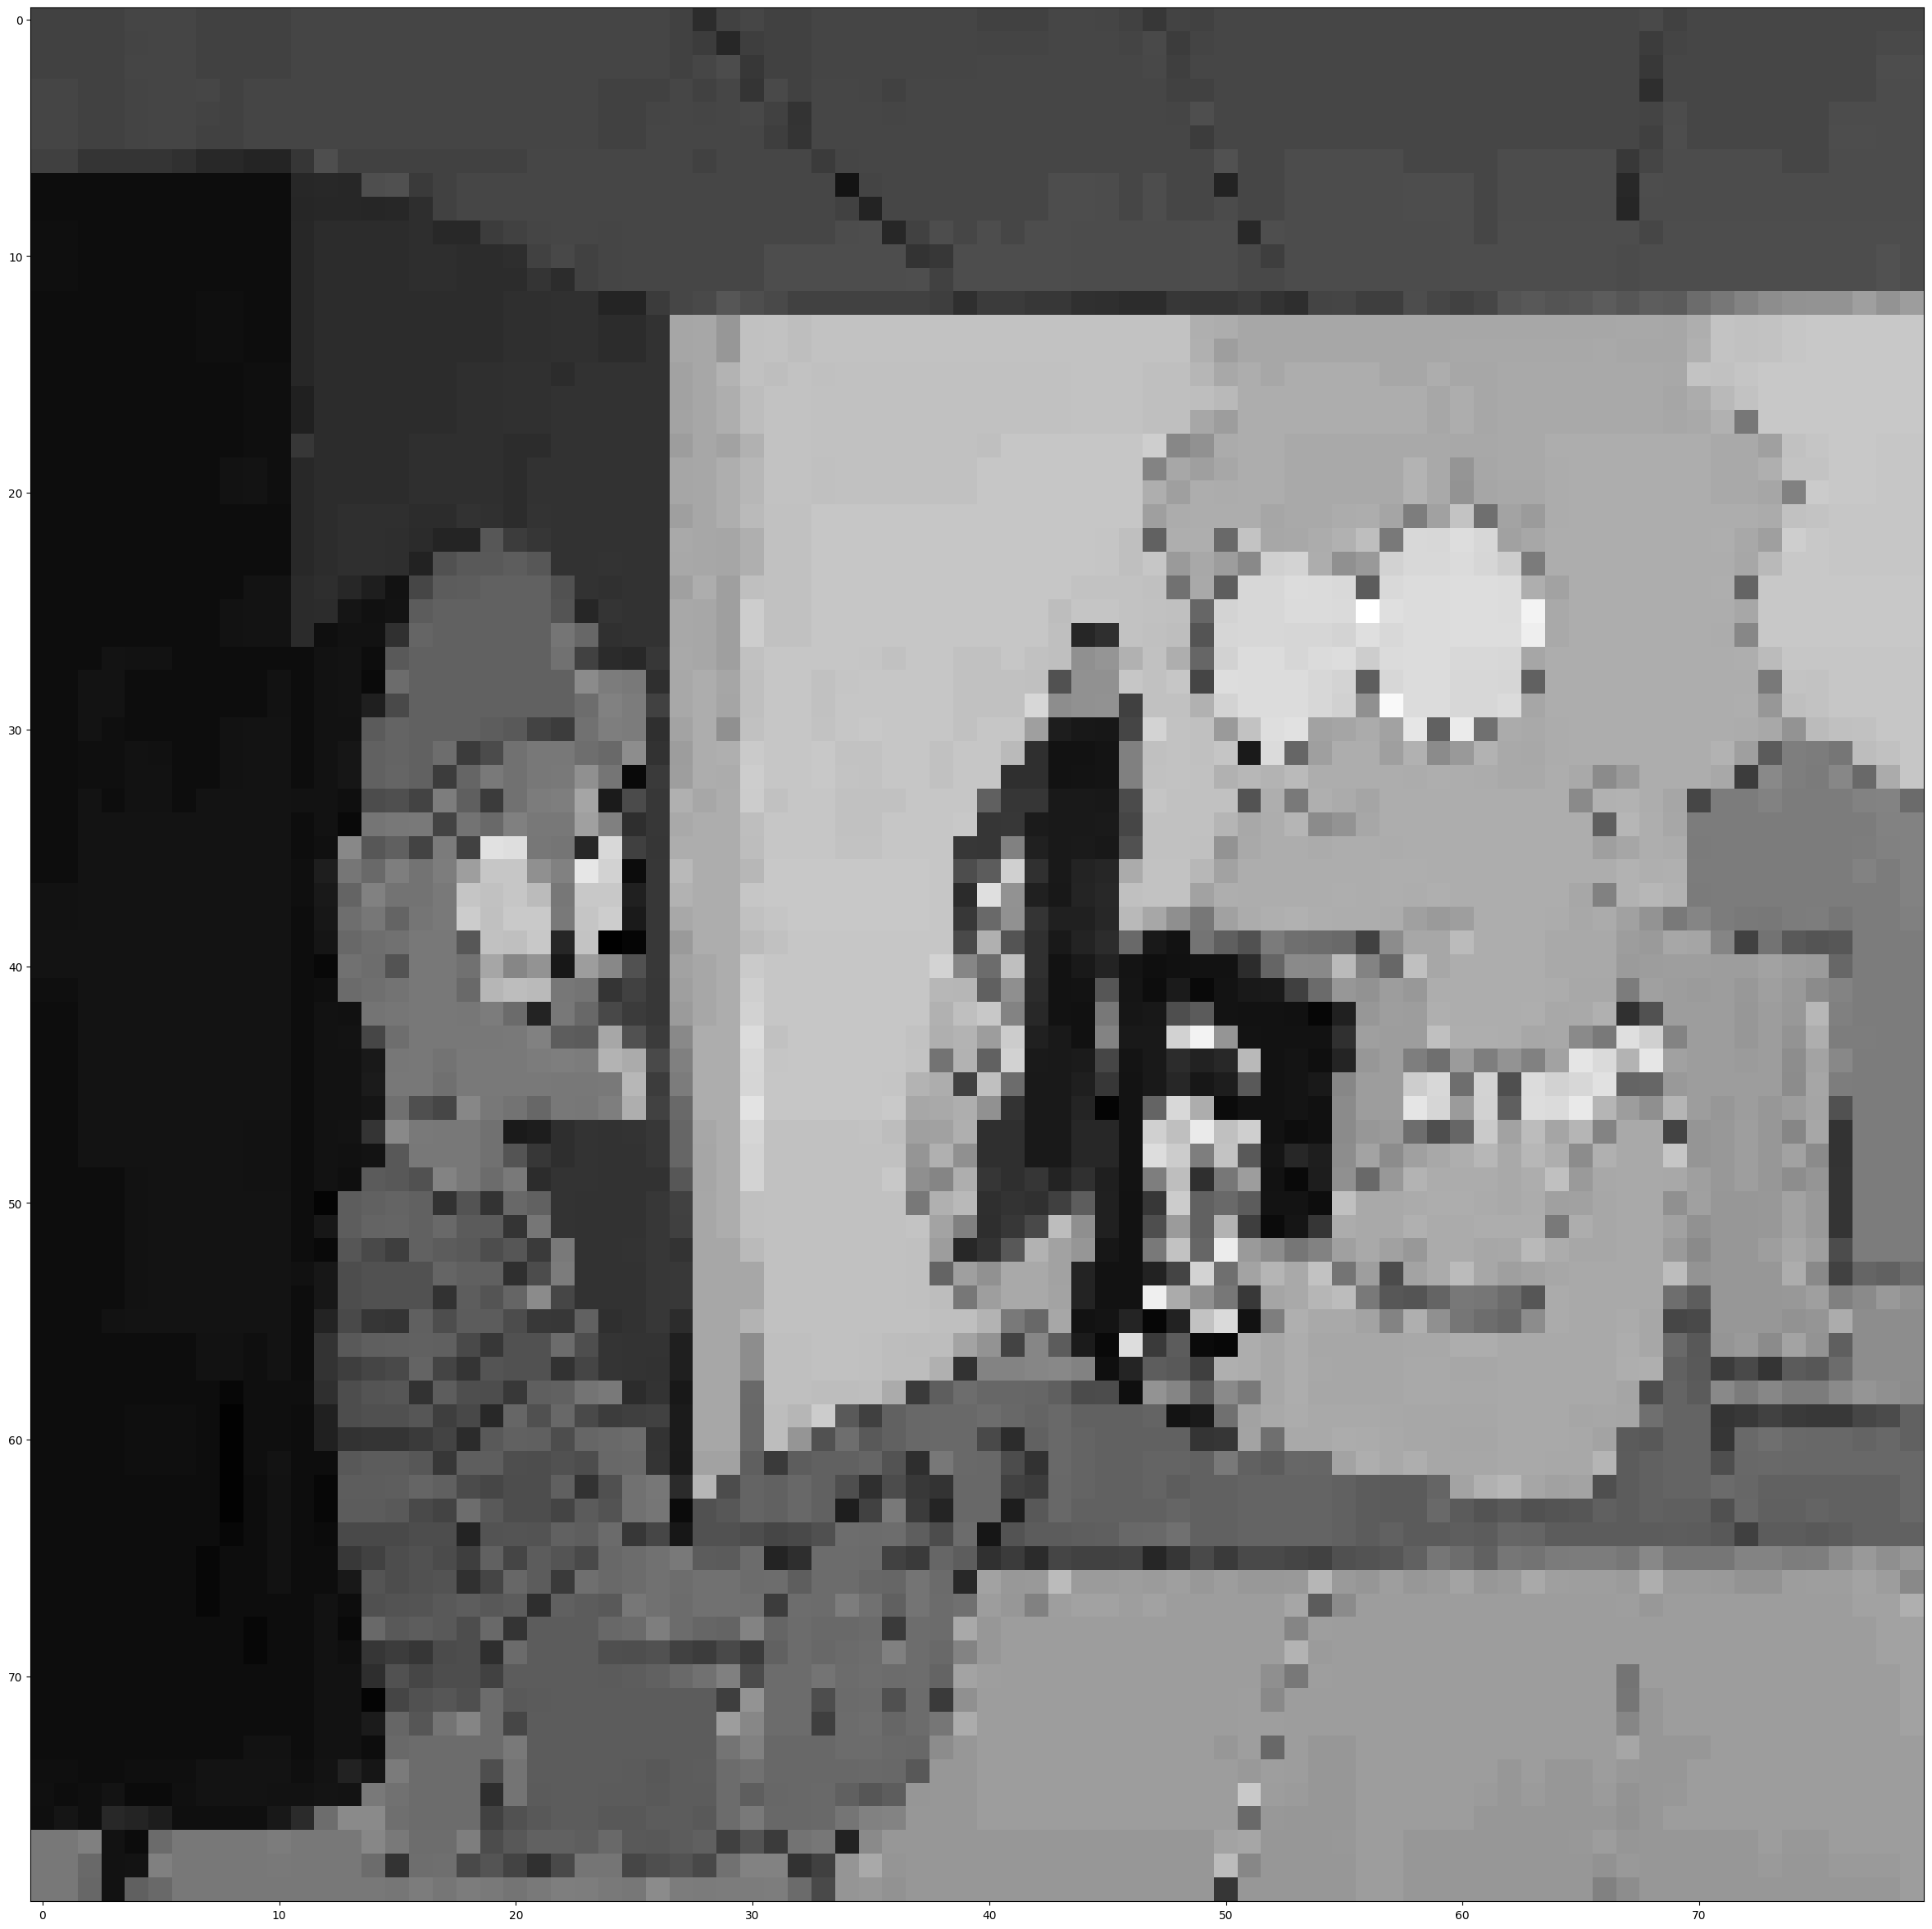

In [33]:
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [35]:
features,labels=caer.sep_train(train,IMG_SIZE=IMG_SIZE)

In [38]:
labels

array([3, 7, 4, ..., 1, 2, 0])

In [36]:
features

array([[[[ 64],
         [ 64],
         [ 64],
         ...,
         [ 68],
         [ 68],
         [ 68]],

        [[ 64],
         [ 64],
         [ 64],
         ...,
         [ 68],
         [ 71],
         [ 71]],

        [[ 64],
         [ 64],
         [ 64],
         ...,
         [ 68],
         [ 74],
         [ 74]],

        ...,

        [[114],
         [114],
         [121],
         ...,
         [148],
         [148],
         [148]],

        [[114],
         [114],
         [101],
         ...,
         [146],
         [146],
         [148]],

        [[114],
         [114],
         [ 98],
         ...,
         [143],
         [143],
         [148]]],


       [[[ 73],
         [ 73],
         [ 70],
         ...,
         [ 68],
         [ 68],
         [ 68]],

        [[ 73],
         [ 73],
         [ 70],
         ...,
         [ 68],
         [ 68],
         [ 68]],

        [[ 73],
         [ 73],
         [ 71],
         ...,
         [ 68],
         [

In [40]:
# normalize the feature set to be in range of 0-1 and the labels
from tensorflow.keras.utils import to_categorical
features=caer.normalize(features)
labels=to_categorical(labels,len(characters))

In [41]:
features

array([[[[9.8423695e-04],
         [9.8423695e-04],
         [9.8423695e-04],
         ...,
         [1.0457517e-03],
         [1.0457517e-03],
         [1.0457517e-03]],

        [[9.8423695e-04],
         [9.8423695e-04],
         [9.8423695e-04],
         ...,
         [1.0457517e-03],
         [1.0918878e-03],
         [1.0918878e-03]],

        [[9.8423695e-04],
         [9.8423695e-04],
         [9.8423695e-04],
         ...,
         [1.0457517e-03],
         [1.1380239e-03],
         [1.1380239e-03]],

        ...,

        [[1.7531719e-03],
         [1.7531719e-03],
         [1.8608228e-03],
         ...,
         [2.2760478e-03],
         [2.2760478e-03],
         [2.2760478e-03]],

        [[1.7531719e-03],
         [1.7531719e-03],
         [1.5532487e-03],
         ...,
         [2.2452904e-03],
         [2.2452904e-03],
         [2.2760478e-03]],

        [[1.7531719e-03],
         [1.7531719e-03],
         [1.5071126e-03],
         ...,
         [2.1991543e-03],
        

In [42]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [44]:
x_train,x_val,y_train,y_val=caer.train_val_split(features,labels,val_ratio=.2)

In [45]:
del train
del features
del labels
gc.collect()

0

In [48]:
BATCH_SIZE=32
EPOCHS=10

In [49]:
#  image data generator
datagen=canaro.generators.imageDataGenerator()
train_gen=datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)

In [67]:
!pip install --upgrade canaro

In [69]:
# creating the model
model=canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels=channels,output_dim=len(characters),
                                         loss='binary_cross_entropy',decay=1e-6,learning_rate=0.001,
                                         momentum=.9,nesterov=True)



ValueError: Argument(s) not recognized: {'lr': 0.001}

In [78]:
import canaro.models.simpsons as simpsons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def fixed_createSimpsonsModel(IMG_SIZE, channels, output_dim, loss, decay, learning_rate, momentum, nesterov):
    model = Sequential()
    # The conv layer from the original canaro simpsons model
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], channels)))
    model.add(Flatten())
    model.add(Dense(output_dim, activation='softmax'))
    # Fix here: use learning_rate instead of lr
    optimizer = SGD(learning_rate=learning_rate, decay=decay, momentum=momentum, nesterov=nesterov)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Monkey patch the function inside canaro.models.simpsons
simpsons.createSimpsonsModel = fixed_createSimpsonsModel

# Now you can call createSimpsonsModel safely:
model = simpsons.createSimpsonsModel(
    IMG_SIZE=IMG_SIZE,
    channels=channels,
    output_dim=len(characters),
    loss='binary_crossentropy',
    decay=1e-6,
    learning_rate=0.001,
    momentum=0.9,
    nesterov=True
)


In [79]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 78, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 194688)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │     1,946,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,947,210 (7.43 MB)

 Trainable params: 1,947,210 (7.43 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
from tensorflow.keras.callbacks import LearningRateScheduler 
callback_list=[LearningRateScheduler(canaro.lr_schedule)]

In [81]:
training=model.fit(train_gen,steps_per_epoch=len(x_train)//BATCH_SIZE,epochs=EPOCHS,
                   validation_data=(x_val,y_val),validation_steps=len(y_val)//BATCH_SIZE,
                  callbacks=callback_list)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.1438 - loss: 0.3891 - val_accuracy: 0.1606 - val_loss: 0.3234 - learning_rate: 0.0100
Epoch 2/10
  1/345 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1562 - loss: 0.3191

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1562 - loss: 0.3191 - val_accuracy: 0.1606 - val_loss: 0.3234 - learning_rate: 0.0100
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.1629 - loss: 0.3237 - val_accuracy: 0.1606 - val_loss: 0.3232 - learning_rate: 0.0100
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1875 - loss: 0.3225 - val_accuracy: 0.1606 - val_loss: 0.3232 - learning_rate: 0.0100
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.1604 - loss: 0.3233 - val_accuracy: 0.1606 - val_loss: 0.3228 - learning_rate: 0.0100
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1250 - loss: 0.3260 - val_accuracy: 0.1606 - val_loss: 0.3228 - learning_rate: 0.0100
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.1662 - loss: 0.3231 - val_accuracy: 0.1606 - val_loss: 0.3239 - learning_rate: 0.0100
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1562 - loss: 0.3245 - val_a

In [102]:
test_path=r'/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

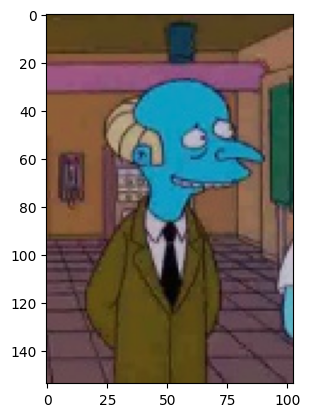

In [103]:
import cv2 as cv
img=cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()

In [104]:
def prepare(img):
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img=cv.resize(img,IMG_SIZE)
    img=caer.reshape(img,IMG_SIZE,1)
    return img

In [105]:
predictions=model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [106]:
predictions

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [107]:
print(characters[np.argmax(predictions[0])])

homer_simpson
